## ESG Quick Start
This notebook demonstrates how to use the Access layer functions in conjunction with get_data screener queries to generate information surrounding the ESG universe. The Access layer provides a simplified programmatic interface designed for FinCoders. We then take a look at how to complete a number of common tasks for ESG related use cases which could include:

### Equities Use-Cases:

* **Fundamental strategies**: integrate ESG factors into absolute and relative valuation models;
* **Quant / Smart beta strategies**: integrate ESG factors into quantitative models and adjust weights on securities based on their ESG score;
* Identify correlations between ESG scores & price movements to generate alpha and/or reduce risk.


### Alternative Use-Cases:

* **Fixed-Income**: Understanding how ESG issues can affect credit risk, interest rate risk, yield curve risk, and liquidity risk & affect a bond.

* **Corporate Credit**: Combine ESG scores with credit analysis. Assess the impact of ESG issues on a company’s ability to pay its debt obligations and liabilities.

* **Structured Credit**: Use ESG scores to capture risks at the transaction  level (relating  to  the  originator/  servicer/issuer  of  the  securities), at the “collateral” or “cover” pool of underlying assets, and sometimes, informing a view on the overall deal structure.

#### Learn more

To learn more about the Data Library for Python please join the LSEG Developer Community. By [registering](https://developers.lseg.com/iam/register) and [logging](https://developers.lseg.com/content/devportal/en_us/initCookie.html) into the LSEG Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
this [Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The LSEG Developer Community will be happy to help. 

----

## Some Imports to start with

In [1]:
import refinitiv.data as rd
import numpy as np
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Open the data session

The open_session() function creates and open sessions based on the information contained in the refinitiv-data.config.json configuration file. Please edit this file to set the session type and other parameters required for the session you want to open.

In [16]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x7f8052780c40 {name='codebook'}>

## Retrieve data

### Get ESG Coverage Universe - Screener Query - broken up by Region of HQ

1) Europe, Africa & Oceania

In [17]:
df = rd.get_data(["SCREEN(U(IN(Equity(active,public,primary))/*UNV:Public*/), TR.HasESGCoverage==true, IN(TR.HeadquartersRegion,""Europe"",""Africa"",""Oceania""), CURN=USD)"],["TR.CommonName;TR.HasESGCoverage;TR.HeadquartersRegion"])
df

,Instrument,Company Common Name,ESG Coverage Flag,Region of Headquarters
0,MBWS.PA,Marie Brizard Wine and Spirits SA,True,Europe
1,AFEJ.J,AECI Ltd,True,Africa
2,AELJ.J,Altron Ltd,True,Africa
3,AAL.L,Anglo American PLC,True,Europe
4,AVIJ.J,Avi Ltd,True,Africa
...,...,...,...,...
3546,LLL.AX,Leo Lithium Ltd,True,Oceania
3547,TLC.AX,Lottery Corporation Ltd,True,Oceania
3548,HLUNa.CO,H Lundbeck A/S,True,Europe
3549,HLN.L,HALEON PLC,True,Europe


2) Asia

In [ ]:
# df1 = rd.get_data(["SCREEN(U(IN(Equity(active,public,primary))/*UNV:Public*/), TR.HasESGCoverage==true, IN(TR.HeadquartersRegion,""Asia""), CURN=USD)"],["TR.CommonName;TR.HasESGCoverage;TR.HeadquartersRegion"])
# df1

3) Americas

In [45]:
# df2 = rd.get_data(["SCREEN(U(IN(Equity(active,public,primary))/*UNV:Public*/), TR.HasESGCoverage==true, IN(TR.HeadquartersRegion,""Americas""), CURN=USD)"],["TR.CommonName;TR.HasESGCoverage;TR.HeadquartersRegion"])
# df2

In [18]:
# esg_All = pd.concat([df,df1,df2], ignore_index=True)
esg_All = df
esg_All

,Instrument,Company Common Name,ESG Coverage Flag,Region of Headquarters
0,MBWS.PA,Marie Brizard Wine and Spirits SA,True,Europe
1,AFEJ.J,AECI Ltd,True,Africa
2,AELJ.J,Altron Ltd,True,Africa
3,AAL.L,Anglo American PLC,True,Europe
4,AVIJ.J,Avi Ltd,True,Africa
...,...,...,...,...
3546,LLL.AX,Leo Lithium Ltd,True,Oceania
3547,TLC.AX,Lottery Corporation Ltd,True,Oceania
3548,HLUNa.CO,H Lundbeck A/S,True,Europe
3549,HLN.L,HALEON PLC,True,Europe


### Task 2: For each company in our universe - what is the earliest date ESG data is available?

In [49]:
def chunks(l, n):
    for i in range(0,len(l),n):
        yield l[i:i+n]

In [50]:
def data_to_dict(df3, my_dict, empty_rics):
    rics = []
    [rics.append(ric[0]) for ric in df3.columns]
    rics = list(set(rics))
    for ric in rics:
        df3_ric = df3[ric].dropna(subset = ['ESG Combined Score'])
        if len(df3_ric) > 0:
            my_dict[ric] = {'date_min':df3_ric.first_valid_index(), 'date_max':df3_ric['ESG Period Last Update Date'][-1]}
        else:
            empty_rics.append(ric)
    return my_dict, empty_rics

In [51]:
ric_chunks = list(chunks(list(esg_All['Instrument'].values),1000))
i = 0
my_dict ={}
empty_rics = []
for chunk in ric_chunks:
    i+=1
    print(len(ric_chunks)-i)
    max_retry = 0
    while max_retry<3:
        try:
            df3 = rd.get_history(chunk,['TR.TRESGCScore(SDate=0,EDate=-19,Period=FY0,Frq=FY)',
                            'TR.ESGPeriodLastUpdateDate(SDate=0,EDate=-19,Period=FY0,Frq=FY)'])
            if len(df3) >0:
                my_dict, empty_rics = data_to_dict(df3, my_dict, empty_rics)
        except Exception as e:
            print(e)
            max_retry+=1
            continue
        
        break

3
2
1
0


In [52]:
pd.DataFrame(my_dict).T

,date_min,date_max
QBE.AX,2004-12-31,2023-11-17
UNPI.MI,2004-12-31,2023-11-10
SBRY.L,2002-03-30,2023-07-07
ANEA.L,2020-12-31,2023-09-29
CFX.L,2021-04-30,2023-11-10
...,...,...
EBOX.L,2020-09-30,2023-11-17
RAI.L,2020-12-31,2023-11-10
GAMB.OQ,2022-12-31,2023-11-03
KTAG.DE,2020-12-31,2023-07-05


In [53]:
len(empty_rics)

358

### Task 3: View ESG Scores for Universe

In [54]:
esg_Scores = pd.DataFrame()
i = 0
for chunk in ric_chunks:
    i+=1
    print(len(ric_chunks)-i)
    max_retry = 0
    while max_retry<3:
        try:
            df3x = rd.get_history(chunk,['TR.TRESGResourceUseScore(Period=FY0)',
                                    'TR.TRESGEmissionsScore(Period=FY0)',
                                    'TR.TRESGInnovationScore(Period=FY0)',
                                    'TR.TRESGWorkforceScore(Period=FY0)',
                                    'TR.TRESGHumanRightsScore(Period=FY0)',
                                    'TR.TRESGCommunityScore(Period=FY0)',
                                    'TR.TRESGProductResponsibilityScore(Period=FY0)',
                                    'TR.TRESGShareholdersScore(Period=FY0)'
                                   ])
            if len(df3x):
                esg_Scores = pd.concat([esg_Scores,df3x])
            else:
                esg_Scores = df3x
        except Exception as e:
            print(e)
            continue
        break
        
esg_Scores

3
2
1
0


0973.HK                                                 \
           Community Score Emissions Score Environmental Innovation Score   
Date                                                                        
2008-09-30            <NA>            <NA>                           <NA>   
2017-12-31            <NA>            <NA>                           <NA>   
2019-12-31            <NA>            <NA>                           <NA>   
2020-06-30            <NA>            <NA>                           <NA>   
2020-09-30            <NA>            <NA>                           <NA>   
...                    ...             ...                            ...   
2023-02-28            <NA>            <NA>                           <NA>   
2023-03-31            <NA>            <NA>                           <NA>   
2023-04-30            <NA>            <NA>                           <NA>   
2023-05-31            <NA>            <NA>                           <NA>   
2023-06-30            <NA>            <NA>                           <NA>   

                                                                               \
           Human Rights Score Product Responsibility Score Resource Use Score   
Date                                                                            
2008-09-30               <NA>                         <NA>               <NA>   
2017-12-31               <NA>                         <NA>               <NA>   
2019-12-31               <NA>                         <NA>               <NA>   
2020-06-30               <NA>                         <NA>               <NA>   
2020-09-30               <NA>                         <NA>               <NA>   
...                       ...                          ...                ...   
2023-02-28               <NA>                         <NA>               <NA>   
2023-03-31               <NA>                         <NA>               <NA>   
2023-04-30               <NA>                         <NA>               <NA>   
2023-05-31               <NA>                         <NA>               <NA>   
2023-06-30               <NA>                         <NA>               <NA>   

                                                       0W6K.L                  \
           Shareholders Score Workforce Score Community Score Emissions Score   
Date                                                                            
2008-09-30               <NA>            <NA>            <NA>            <NA>   
2017-12-31               <NA>            <NA>            <NA>            <NA>   
2019-12-31               <NA>            <NA>            <NA>            <NA>   
2020-06-30               <NA>            <NA>            <NA>            <NA>   
2020-09-30               <NA>            <NA>            <NA>            <NA>   
...                       ...             ...             ...             ...   
2023-02-28               <NA>            <NA>            <NA>            <NA>   
2023-03-31               <NA>            <NA>            <NA>            <NA>   
2023-04-30               <NA>            <NA>            <NA>            <NA>   
2023-05-31               <NA>            <NA>            <NA>            <NA>   
2023-06-30               <NA>            <NA>            <NA>            <NA>   

            ...              ZV.MI                           ZWM.S  \
            ... Shareholders Score Workforce Score Community Score   
Date        ...                                                      
2008-09-30  ...               <NA>            <NA>            <NA>   
2017-12-31  ...               <NA>            <NA>            <NA>   
2019-12-31  ...               <NA>            <NA>            <NA>   
2020-06-30  ...               <NA>            <NA>            <NA>   
2020-09-30  ...               <NA>            <NA>            <NA>   
...         ...                ...             ...             ...   
2023-02-28  ...               <NA>      

In [55]:
esg_Scores['MBWS.PA'].dropna()

,Community Score,Emissions Score,Environmental Innovation Score,Human Rights Score,Product Responsibility Score,Resource Use Score,Shareholders Score,Workforce Score
Date,,,,,,,,
2022-12-31,23.305085,41.810345,54.6875,64.851485,40.086207,69.469027,73.45679,55.508475


### Task 4: Can we ascertain any differences between ESG Scores with and without controversies for FAANG co's?

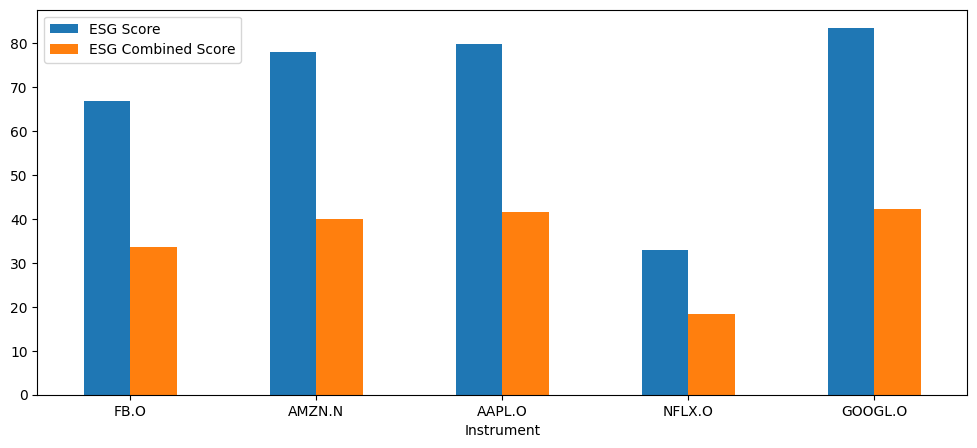

In [56]:
rics = ['FB.O','AMZN.N','AAPL.O','NFLX.O','GOOGL.O']
df4 = rd.get_data(rics,['TR.TRESGScore(Period=FY0)', 'TR.TRESGCScore(Period=FY0)'])
df4.index = df4['Instrument']
ax = df4.plot.bar(rot=0,figsize=(12,5))

### Task 5: Can we ascertain such differences across industry?

In [57]:
spx = rd.get_data('0#.SPX',['TR.TRBCEconomicSector','TR.TRESGScore(Period=FY0)', 
                                 'TR.TRESGCScore(Period=FY0)','TR.TRESGCControversiesScore(Period=FY0)'])
spx

,Instrument,TRBC Economic Sector Name,ESG Score,ESG Combined Score,ESG Controversies Score
0,POOL.OQ,Consumer Cyclicals,48.186515,48.186515,100.0
1,CHRW.OQ,Industrials,38.1063,38.1063,100.0
2,AJG.N,Financials,54.526801,54.526801,65.909091
3,CNP.N,Utilities,48.219516,48.219516,100.0
4,AMCR.N,Basic Materials,72.924234,72.924234,100.0
...,...,...,...,...,...
498,PSX.N,Energy,76.354234,49.194066,22.033898
499,SCHW.N,Financials,57.74002,57.74002,72.340426
500,SNPS.OQ,Technology,67.579553,67.579553,100.0
501,J.N,Industrials,82.541834,60.658672,38.77551


In [58]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Instrument                 503 non-null    string 
 1   TRBC Economic Sector Name  503 non-null    string 
 2   ESG Score                  500 non-null    Float64
 3   ESG Combined Score         500 non-null    Float64
 4   ESG Controversies Score    500 non-null    Float64
dtypes: Float64(3), string(2)
memory usage: 21.2 KB


In [59]:
dct = {'ESG Score':'mean', 'ESG Combined Score':'mean','ESG Controversies Score':'mean'}
df5 = spx.groupby('TRBC Economic Sector Name').agg(**{k: (k,v) for k,v in dct.items()})
df5

,ESG Score,ESG Combined Score,ESG Controversies Score
TRBC Economic Sector Name,,,
Basic Materials,72.709001,64.379797,72.487631
Consumer Cyclicals,65.501391,50.682266,48.657641
Consumer Non-Cyclicals,73.564275,55.874081,46.269162
Energy,69.330266,53.747848,52.0798
Financials,66.536373,57.200204,65.454364
Healthcare,72.76018,59.796327,59.381464
Industrials,66.273535,56.975709,66.071158
Real Estate,72.3254,71.24542,95.859649
Technology,66.818447,57.447022,65.157216


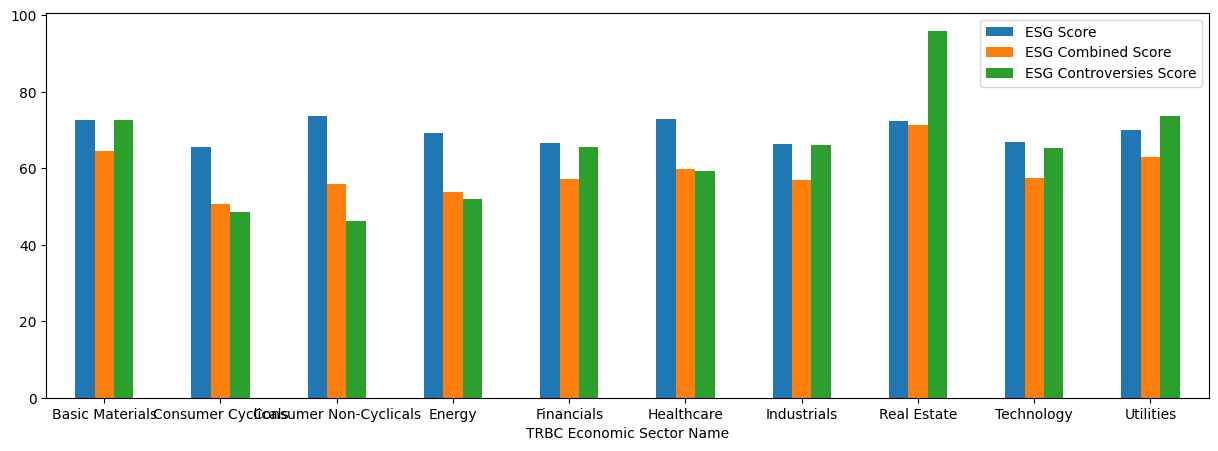

In [60]:
ax = df5.plot.bar(rot=0,figsize=(15,5))

### Task 6: Do Larger co's have better scores than medium/small? 

In [61]:
df6 = rd.get_data('0#.SPX',['TR.CompanyMarketCap','TR.TRESGScore(Period=FY0)', 'TR.TRESGCScore(Period=FY0)'])
df6

,Instrument,Company Market Cap,ESG Score,ESG Combined Score
0,POOL.OQ,13779840747.940001,48.186515,48.186515
1,CHRW.OQ,9651706801.379999,38.1063,38.1063
2,AJG.N,54188741000.0,54.526801,54.526801
3,CNP.N,17541702732.400002,48.219516,48.219516
4,AMCR.N,13422939990.719999,72.924234,72.924234
...,...,...,...,...
498,PSX.N,51919157405.75,76.354234,49.194066
499,SCHW.N,101936639549.220001,57.74002,57.74002
500,SNPS.OQ,82281907511.509995,67.579553,67.579553
501,J.N,15621988714.68,82.541834,60.658672


In [62]:
df6['Size'] = ""

for i, mcap in enumerate(df6['Company Market Cap']):
    if mcap > 200000000000: 
        df6['Size'][i] = 'Mega'
    elif 10000000000 < mcap <= 200000000000:
        df6['Size'][i] = 'Large'
    elif 2000000000 < mcap <= 10000000000:
        df6['Size'][i] = 'Mid'
    elif 300000000 < mcap <= 2000000000:
        df6['Size'][i] = 'Small'
    elif 50000000 < mcap <= 300000000:
        df6['Size'][i] = 'Micro'
    else:
        df6['Size'][i] = 'Sub Micro'
df6

/tmp/ipykernel_1772/4183397796.py:7:SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1772/4183397796.py:9:SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1772/4183397796.py:5:SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Instrument,Company Market Cap,ESG Score,ESG Combined Score,Size
0,POOL.OQ,13779840747.940001,48.186515,48.186515,Large
1,CHRW.OQ,9651706801.379999,38.1063,38.1063,Mid
2,AJG.N,54188741000.0,54.526801,54.526801,Large
3,CNP.N,17541702732.400002,48.219516,48.219516,Large
4,AMCR.N,13422939990.719999,72.924234,72.924234,Large
...,...,...,...,...,...
498,PSX.N,51919157405.75,76.354234,49.194066,Large
499,SCHW.N,101936639549.220001,57.74002,57.74002,Large
500,SNPS.OQ,82281907511.509995,67.579553,67.579553,Large
501,J.N,15621988714.68,82.541834,60.658672,Large


In [63]:
dct = {'Company Market Cap':'mean','ESG Score':'mean', 'ESG Combined Score':'mean'}
df7 = df6.groupby('Size').agg(**{k: (k,v) for k,v in dct.items()})
df7

,Company Market Cap,ESG Score,ESG Combined Score
Size,,,
Large,46399907847.025009,68.709341,59.049839
Mega,674825867416.767334,73.313553,44.434136
Mid,7860041360.533334,66.257378,57.979068


<AxesSubplot:xlabel='Size'>

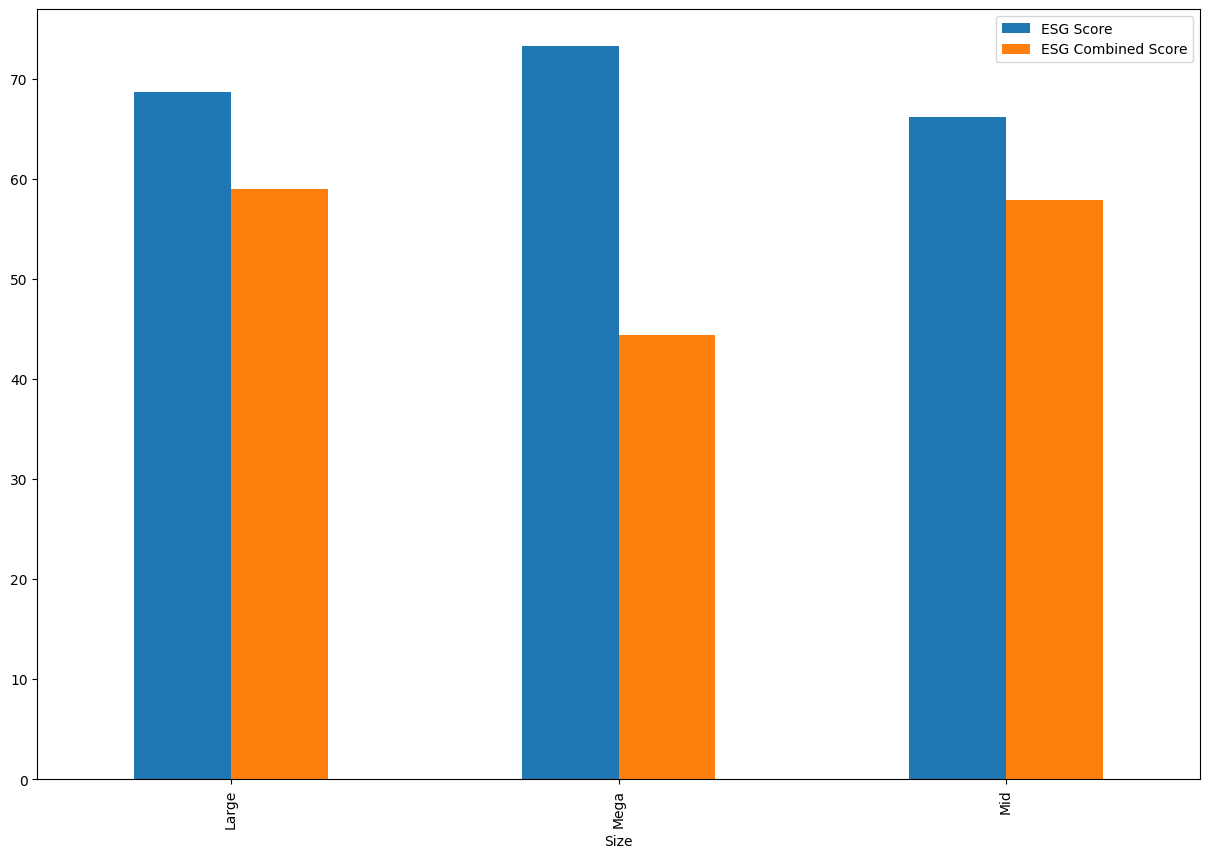

In [64]:
df7[['ESG Score','ESG Combined Score']].plot.bar(figsize=(15,10))

In [65]:
df7.groupby('Size').describe()

Company Market Cap                                                  \
                   count                 mean   std                  min   
Size                                                                       
Large                  1   46399907847.025009  <NA>   46399907847.025009   
Mega                   1  674825867416.767334  <NA>  674825867416.767334   
Mid                    1    7860041360.533334  <NA>    7860041360.533334   

                                                                      \
                       25%                  50%                  75%   
Size                                                                   
Large   46399907847.025009   46399907847.025009   46399907847.025009   
Mega   674825867416.767334  674825867416.767334  674825867416.767334   
Mid      7860041360.533334    7860041360.533334    7860041360.533334   

                           ESG Score             ...                        \
                       max     count       mean  ...        75%        max   
Size                                             ...                         
Large   46399907847.025009         1  68.709341  ...  68.709341  68.709341   
Mega   674825867416.767334         1  73.313553  ...  73.313553  73.313553   
Mid      7860041360.533334         1  66.257378  ...  66.257378  66.257378   

      ESG Combined Score                                                    \
                   count       mean   std        min        25%        50%   
Size                                                                         
Large                  1  59.049839  <NA>  59.049839  59.049839  59.049839   
Mega                   1  44.434136  <NA>  44.434136  44.434136  44.434136   
Mid                    1  57.979068  <NA>  57.979068  57.979068  57.979068   

                             
             75%        max  
Size                         
Large  59.049839  59.049839  
Mega   44.434136  44.434136  
Mid    57.979068  57.979068  

[3 rows x 24 columns]

### Task 7: Can we look at CO2 intensity across different industries?


# CEI = Employee Productivity * Energy Intensity * CO2 Intensity

In [66]:
df9 = rd.get_data('0#.SPX',['TR.TRBCEconomicSector','TR.F.SalesPerEmp(Period=FY0)',
                                 'TR.AnalyticEnergyUse(Period=FY0)','TR.CO2EmissionTotal(Period=FY0)', 
                                 'TR.CO2IndirectScope3(Period=FY0)','TR.EnergyUseTotal(Period=FY0)'])

df9.columns = ['Instrument','Sector','Revenue/Employee','EnergyUse/Revenue','CO2Emissions','CO2EmissionsScope3',
               'EnergyUse']
df9['CO2Emissions/EnergyUse'] = df9['CO2Emissions'] / df9['EnergyUse']
df9['CO2Scope12/EnergyUse'] = df9['CO2Emissions'] / df9['EnergyUse']
df9['CO2Scope123/EnergyUse'] = (df9['CO2Emissions'] + df9['CO2EmissionsScope3']) / df9['EnergyUse']
df9['CEIScope12'] = df9['Revenue/Employee'] * df9['EnergyUse/Revenue'] * df9['CO2Emissions/EnergyUse']
df9['CEIScope123'] = df9['Revenue/Employee'] * df9['EnergyUse/Revenue'] * df9['CO2Scope123/EnergyUse']
df9

,Instrument,Sector,Revenue/Employee,EnergyUse/Revenue,CO2Emissions,CO2EmissionsScope3,EnergyUse,CO2Emissions/EnergyUse,CO2Scope12/EnergyUse,CO2Scope123/EnergyUse,CEIScope12,CEIScope123
0,POOL.OQ,Consumer Cyclicals,1074735.130435,106.760328,49242.0,<NA>,659750.0,0.074637,0.074637,<NA>,8563821.929578,<NA>
1,CHRW.OQ,Industrials,1441044.754347,12.232939,27722.0,21359364.0,302112.0,0.091761,0.091761,70.791912,1617576.617025,1247934861.117294
2,AJG.N,Financials,206038.554217,<NA>,47059.0,72650.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,CNP.N,Utilities,1012931.971311,<NA>,4891379.0,26410305.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,AMCR.N,Basic Materials,376769.230769,1374.852998,1883381.0,10276807.0,19995862.0,0.094189,0.094189,0.608135,48789879.71778,315015448.210206
...,...,...,...,...,...,...,...,...,...,...,...,...
498,PSX.N,Energy,12591851.851852,4637.584772,34800000.0,350000000.0,516979400.0,0.067314,0.067314,0.744324,3930859058.850747,43465361087.522049
499,SCHW.N,Financials,649403.202329,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
500,SNPS.OQ,Technology,287409.405843,136.712423,38696.0,4601.0,574765.0,0.067325,0.067325,0.07533,2645359.59804,2959895.971582
501,J.N,Industrials,272540.233333,45.256858,61479.0,77820.0,637786.8,0.096394,0.096394,0.21841,1188957.396442,2693937.38296


<AxesSubplot:ylabel='CEIScope12'>

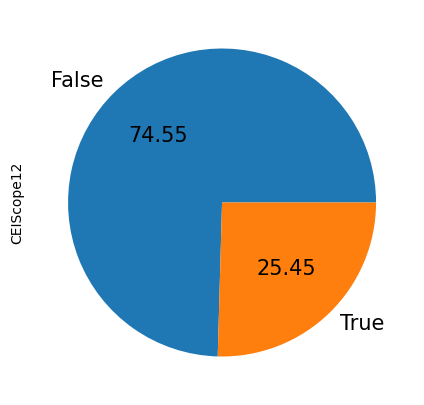

In [67]:
pd.isna(df9['CEIScope12']).value_counts().plot.pie(figsize=(10,5), autopct='%.2f', fontsize=15)

<AxesSubplot:ylabel='CEIScope123'>

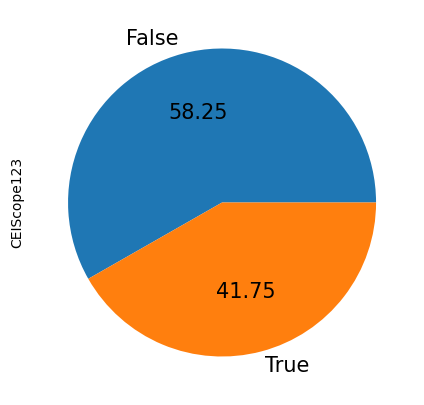

In [68]:
pd.isna(df9['CEIScope123']).value_counts().plot.pie(figsize=(10,5), autopct='%.2f', fontsize=15)

<AxesSubplot:ylabel='Sector'>

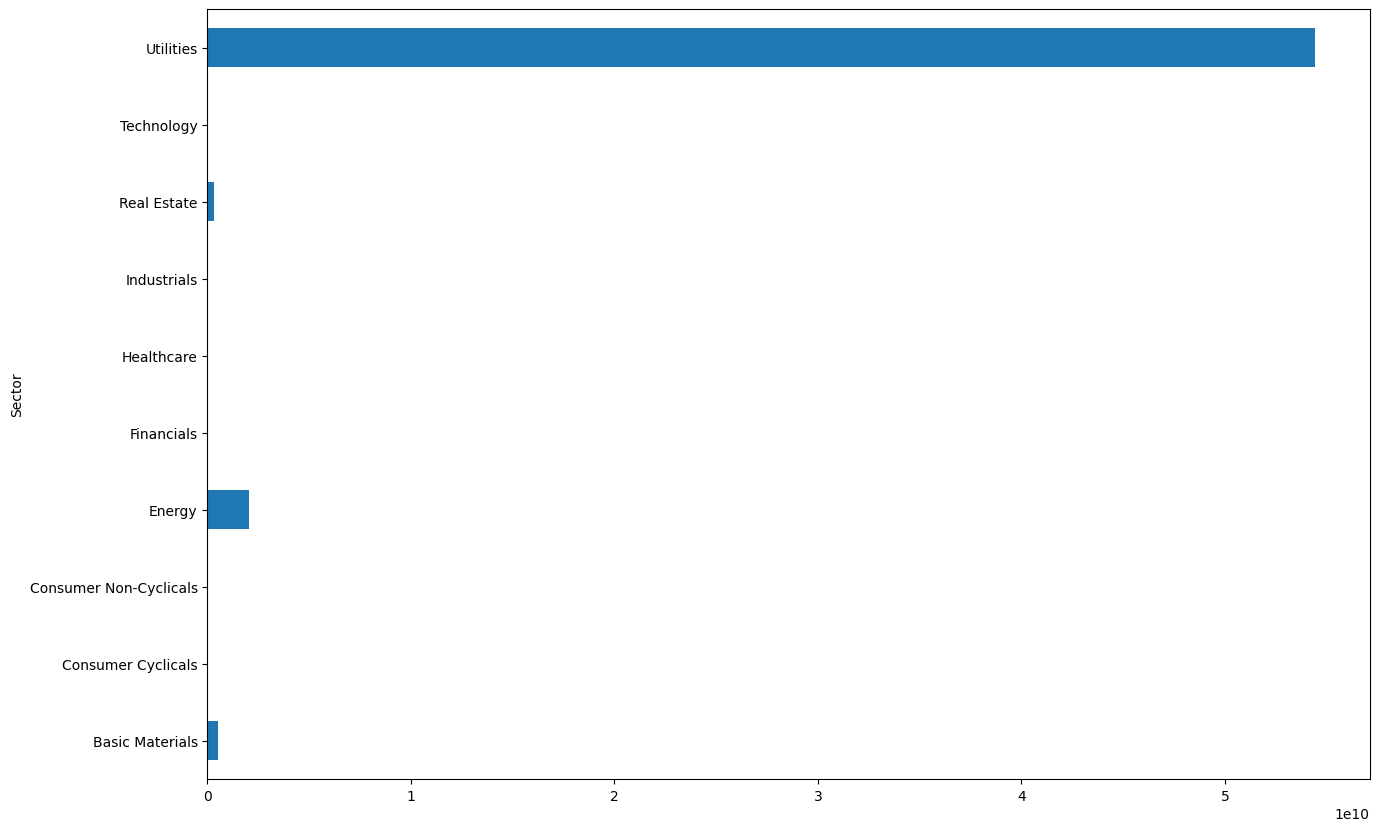

In [69]:
dct = {'CEIScope12':'mean','CEIScope123': 'mean'}
df10 = df9.groupby('Sector').agg(**{k: (k,v) for k,v in dct.items()})
df10['CEIScope12'].plot.barh(figsize=(15,10))

<AxesSubplot:ylabel='Sector'>

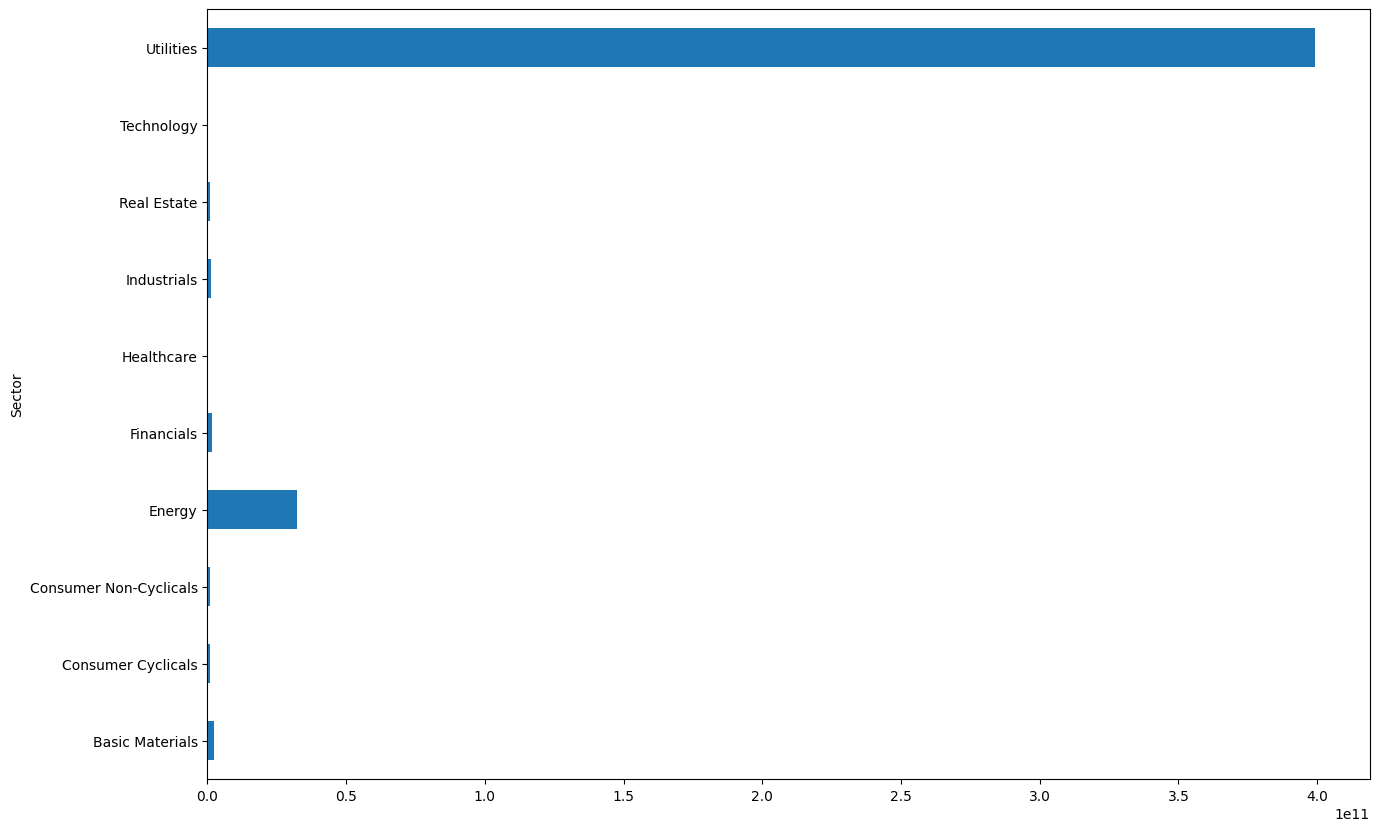

In [70]:
df10['CEIScope123'].plot.barh(figsize=(15,10))

### Energy Intensity and Efficiency Across Stock Universes

<AxesSubplot:ylabel='CEI'>

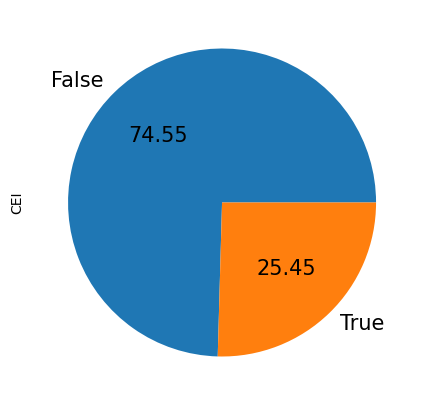

In [20]:
chains = ['0#.SPX',
          # '0#.STOXX','0#.DJAT'
         ]
universe = pd.DataFrame()
 
for chain in chains:
    df11 = rd.get_data(chain,['TR.TRBCEconomicSector','TR.F.SalesPerEmp(Period=FY0)',
                                     'TR.AnalyticEnergyUse(Period=FY0)','TR.CO2EmissionTotal(Period=FY0)', 
                                     'TR.EnergyUseTotal(Period=FY0)'])
 
    df11.columns = ['Instrument','Sector','Revenue/Employee','EnergyUse/Revenue','CO2Emissions','EnergyUse']
    df11['CO2Emissions/EnergyUse'] = df11['CO2Emissions'] / df11['EnergyUse']
    df11['CEI'] = df11['Revenue/Employee'] * df11['EnergyUse/Revenue'] * df11['CO2Emissions/EnergyUse']
    if len(df11):
        universe = pd.concat([universe, df11], axis=0)
pd.isna(universe['CEI']).value_counts().plot.pie(figsize=(15,5), autopct='%.2f', fontsize=15)

<AxesSubplot:ylabel='Sector'>

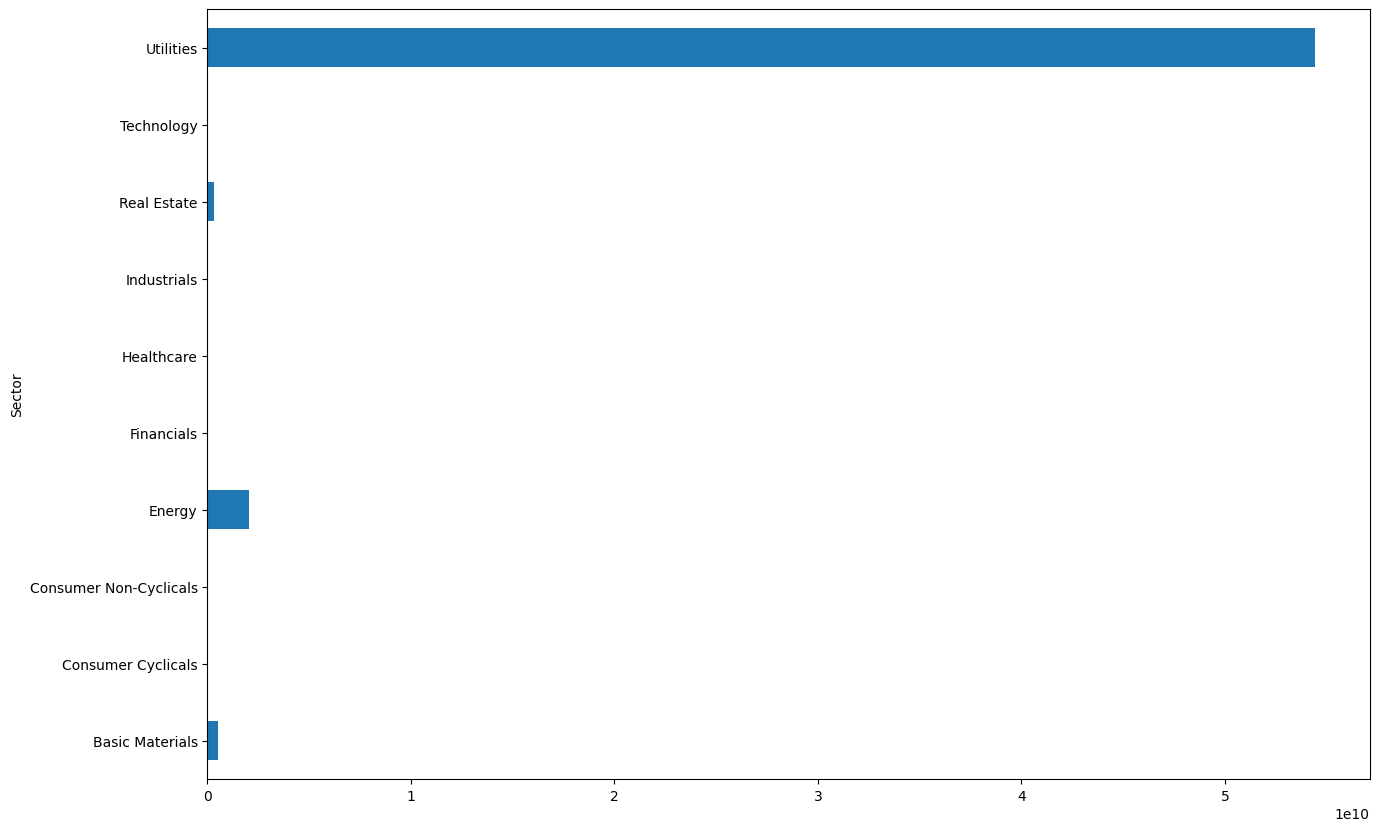

In [21]:
dct={'CEI':'mean'}
df12 = universe.groupby('Sector').agg(**{k: (k,v) for k,v in dct.items()})
df12['CEI'].plot.barh(figsize=(15,10))

Recently a paper by BofA - noted that these was only scope 1 emmissions. EPA defines Scope 1 & Scope 2 emmissons as DIRECT whilst Scope 3 is INDIRECT:

**Scope 3 emissions are the result of activities from assets not owned or controlled by the reporting organization, but that the organization indirectly impacts in its value chain.**

These value chain emmissions can represent a majority of GHG emmissions.

In [22]:
chains = ['0#.SPX',
          # '0#.STOXX','0#.DJAT'
         ]
universe2 = pd.DataFrame()

for chain in chains:
    df13= rd.get_data(chain,['TR.HeadquartersCountry','TR.EnergyUseTotal(Period=FY0)',
                                   'TR.EnergyPurchasedDirect(Period=FY0)','TR.EnergyProducedDirect(Period=FY0)', 
                                   'TR.TotalRenewableEnergy(Period=FY0)','TR.AnalyticTotalRenewableEnergy(Period=FY0)',
                                   'TR.EnvSupplyChainMgtScore(Period=FY0)'])

    df13.columns = ['Instrument','Country','TotalEnergyUse','EnergyPurchasedDirect','EnergyProducedDirect',
                    'TotalRenewableEnergy','RenewableEnergyPctTotal','EnvSupplyChainMgtScore']
    df13['CO2Emissions/EnergyUse'] = df11['CO2Emissions'] / df11['EnergyUse']
    df13['CEI'] = df11['Revenue/Employee'] * df11['EnergyUse/Revenue'] * df11['CO2Emissions/EnergyUse']
    if len(df13):
        universe2 = pd.concat([universe2, df13], axis=0)
        
universe2

,Instrument,Country,TotalEnergyUse,EnergyPurchasedDirect,EnergyProducedDirect,TotalRenewableEnergy,RenewableEnergyPctTotal,EnvSupplyChainMgtScore,CO2Emissions/EnergyUse,CEI
0,POOL.OQ,United States of America,659750.0,<NA>,<NA>,<NA>,<NA>,0.0,0.074637,8563821.929578
1,CHRW.OQ,United States of America,302112.0,302112.0,<NA>,<NA>,<NA>,0.0,0.091761,1617576.617025
2,AJG.N,United States of America,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,<NA>,<NA>
3,CNP.N,United States of America,<NA>,1480492.8,17495085.6,434235.6,<NA>,0.0,<NA>,<NA>
4,AMCR.N,United Kingdom,19995862.0,19995862.0,<NA>,93622.0,4682.06872,66.091954,0.094189,48789879.71778
...,...,...,...,...,...,...,...,...,...,...
498,PSX.N,United States of America,516979400.0,<NA>,<NA>,<NA>,<NA>,76.72956,0.067314,3930859058.850747
499,SCHW.N,United States of America,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,<NA>,<NA>
500,SNPS.OQ,United States of America,574765.0,574765.0,<NA>,<NA>,<NA>,87.543253,0.067325,2645359.59804
501,J.N,United States of America,637786.8,<NA>,<NA>,360748.8,565626.00543,81.177829,0.096394,1188957.396442


In [23]:
dct = {'TotalEnergyUse':'mean','EnergyPurchasedDirect':'mean', 'EnergyProducedDirect':'mean',
       'TotalRenewableEnergy':'mean','RenewableEnergyPctTotal':'mean','EnvSupplyChainMgtScore':'mean'}

countryagg = universe2.groupby('Country').agg(**{k: (k,v) for k,v in dct.items()})
countryagg

,TotalEnergyUse,EnergyPurchasedDirect,EnergyProducedDirect,TotalRenewableEnergy,RenewableEnergyPctTotal,EnvSupplyChainMgtScore
Country,,,,,,
Bermuda,55826.1824,91882.0,<NA>,2455.0,26719.052698,40.66358
Canada,330120.0,330120.0,<NA>,270475.2,819323.882225,65.771812
Ireland; Republic of,12697893.994625,4409588.886125,72474.2184,663235.593143,218568.271896,74.827278
Israel,385703.0,381261.0,4442.0,4442.0,11516.633264,66.071429
Netherlands,7007881.41916,7007881.41916,<NA>,2144559.351,306021.067242,64.090909
Switzerland,4708133.0,4708133.0,<NA>,2353475.0,499874.366336,47.858356
United Kingdom,167362411.10311,97232788.36891,93506163.6456,11410950.5272,90960.808205,72.60697
United States of America,34490051.566792,36517564.595092,45227777.058617,6814217.628366,2184607.619507,59.01343


### Close the session

In [24]:
rd.close_session()